In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from ipywidgets import *
from manim import *
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
#%matplotlib widget

np.set_printoptions(precision=3, suppress=True, linewidth=100)
def plotLayout(ax,xlim,ylim,title,xlab,ylab):
    # prepares a plot layout
    # Where:
    #- axis ax: figures axis
    #- param xlim: (xmin,xmax)x range of plot
    #- param ylim: (ymin,ymax)y range of plot

    #   Refine plot
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

In [2]:
#import needed: numpy, pyplot, plotLayout
def nd_orbit(fnct, x0, it):
    # calculates orbits of n dimensional map
    # Where:
    #- param fnct: Mapping function mapping x0 to x1 taking a single parameter
    #- param x0: Initial value
    #- param it: Number of iterations
    #- returns: The entire orbit, including the initial value
    #   Initialize
    orbit = np.zeros((it+1,len(x0)))
    orbit[0]=x0
    #   Main loop
    for i in range(1,it+1):
        orbit[i] = fnct(orbit[i-1])
    return orbit

In [3]:
def activation(x):
    #the actication  function f()
    #return (x+abs(x))/2 #ReLu
    return 1/(1+np.exp(-x)) #sigmoid 
    #return np.tanh(x) #tanh


In [4]:
#import needed: numpy, pyplot, plotLayout, nd_orbit
def neuron_orbiter(x0, weightM,bias ,Nit=100, ntrans=10):
    # calculates stable solution henon map
    # Where:
    #- param x0: Initial value
    #- param a: Parameters of Henon map, being [a,b] in the standard expression
    #- returns: An array containing the orbit of the Henon map without transients

    linearmap = lambda x: (weightM @ activation(x) + bias)

    #   Calculate orbit
    orbit = nd_orbit(linearmap, x0, Nit)
    orbit = orbit[ntrans:] #remove the transient (+1 to also remove initial condition)
    return orbit


In [5]:
# Function to detect period
def detect_period(orbit, tolerance=1e-2):
    # Loop through the orbit and find repeating patterns
    for period in range(1, psearch):
        if np.allclose(orbit[-period:], orbit[-2*period:-period], atol=tolerance):
            return period
    return np.inf  # Return infinity if no period is found


def find_p(params1, params2,W,B):
    periods = np.zeros((params1.shape[0], params2.shape[0]))

    for i, p1 in tqdm(enumerate(params1)):
        for j, p2 in enumerate(params2):
            w = W(p1, p2)
            b = B(p1, p2)
            periods[j, i] = detect_period(neuron_orbiter(x0,w,b,Nit,10))
            
    return periods

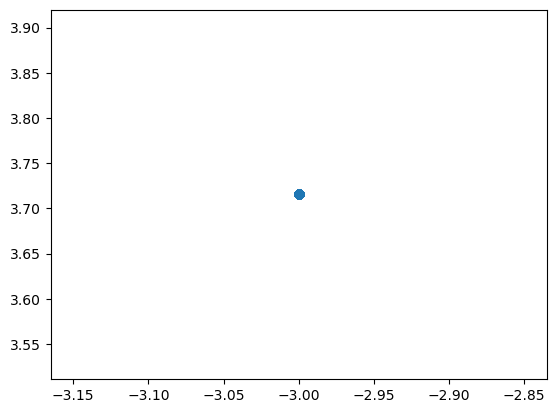

In [10]:
orbit = neuron_orbiter(x0,W(-0,0),b(8,-18),5000,10)

# Unpack the trajectory data (assuming the first row is x, second is y, third is z)
x, y = orbit.T
# Plot the trajectory
plt.scatter(x, y, label='Orbital trajectory')
plt.show()

In [8]:
# w11, w12 = -16, 4
w21 = -6
x0 = np.array([-1,1])

W = lambda p1,p2: np.array([[p1,p2],
                            [w21,0]])
b = lambda p1,p2: np.array([-3,4])


400it [04:48,  1.39it/s]


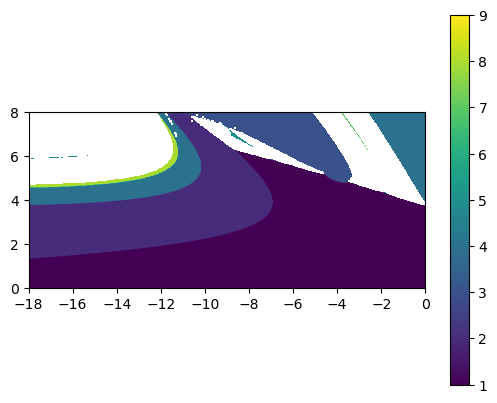

In [9]:
resolution = 400
Nit = 300
psearch = 10
paramspace = np.array([[-18,0],[0,8]])
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[1],resolution)
plt.imshow(find_p(params1, params2, W,b),origin='lower',extent=paramspace.ravel())
plt.colorbar()

In [210]:
slices = {}
resolution = 200
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[0],resolution)
thirdvar_range = np.linspace(0.,10,101)
for thirdvar in thirdvar_range:

    W = lambda p1,p2: np.array([[p1,p2],
                            [thirdvar,0]])
    slices[f"w13_{thirdvar}"] = find_p(params1, params2, W,b)


200it [00:51,  3.85it/s]
200it [00:46,  4.32it/s]
200it [00:46,  4.32it/s]
200it [00:46,  4.30it/s]
200it [00:46,  4.28it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.31it/s]
200it [00:45,  4.37it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.34it/s]
200it [00:46,  4.30it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.35it/s]
200it [00:46,  4.32it/s]
200it [00:46,  4.33it/s]
200it [00:46,  4.32it/s]
200it [00:45,  4.36it/s]
200it [00:46,  4.34it/s]
200it [00:45,  4.36it/s]
200it [00:45,  4.37it/s]
200it [00:45,  4.36it/s]
200it [00:46,  4.34it/s]
200it [00:45,  4.35it/s]
200it [00:45,  4.37it/s]
200it [00:45,  4.35it/s]
200it [00:46,  4.34it/s]
200it [00:45,  4.37it/s]
200it [00:45,  4.35it/s]
200it [00:46,  4.32it/s]
200it [00:45,  4.35it/s]
200it [00:46,  4.33it/s]
200it [00:45,  4.35it/s]
200it [00:46,  4.32it/s]
200it [00:45,  4.36it/s]
200it [00:46,  4.33it/s]
200it [00:45,  4.38it/s]
200it [00:46,  4.32it/s]


In [204]:
np.savez("data/figure11slices_full_r200_z100.npz", **slices)

In [211]:
data = np.load("data/figure10slices.npz")

In [212]:
data

NpzFile 'data/figure10slices.npz' with keys: b_-3.0, b_-3.111111111111111, b_-3.2222222222222223, b_-3.3333333333333335, b_-3.4444444444444446...

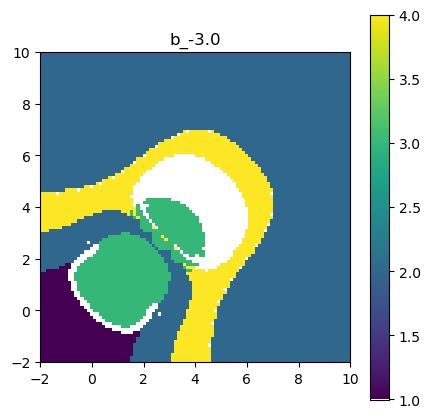

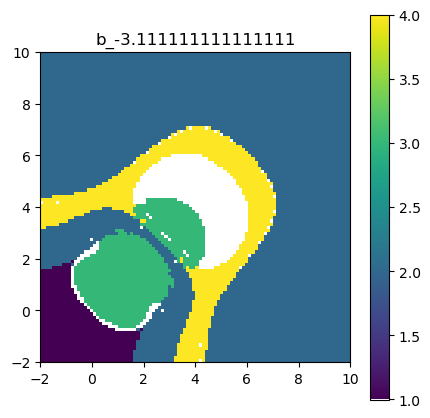

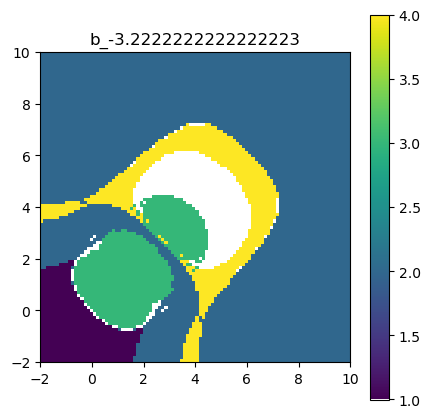

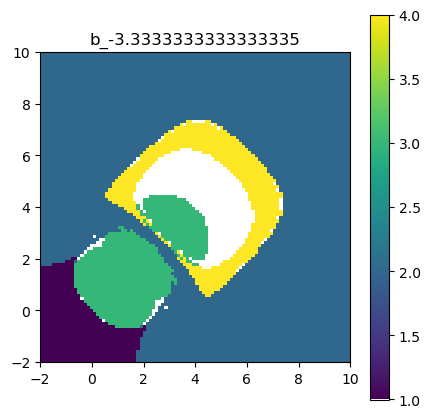

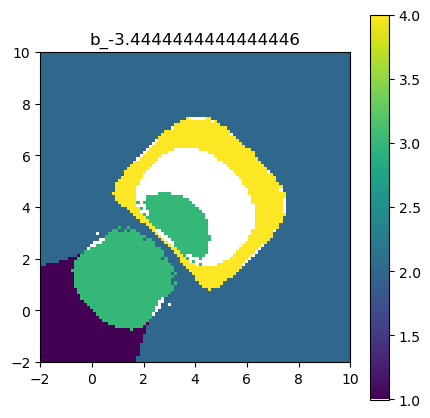

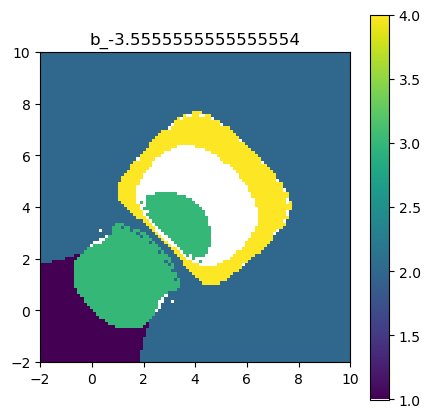

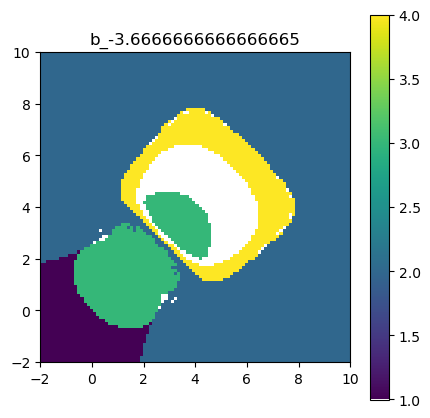

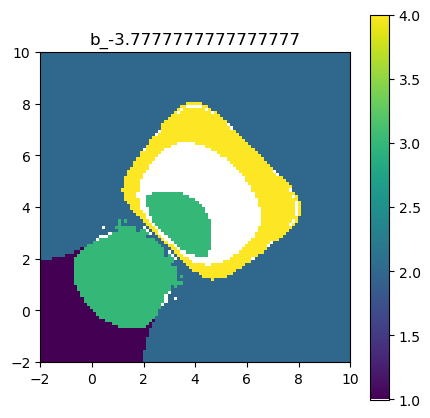

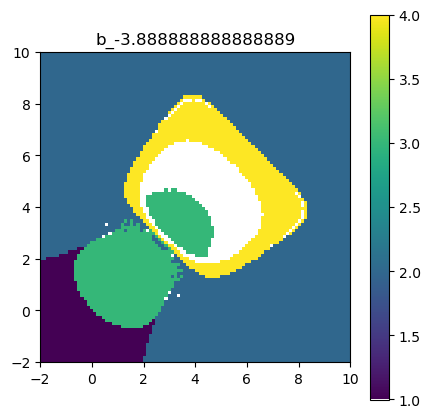

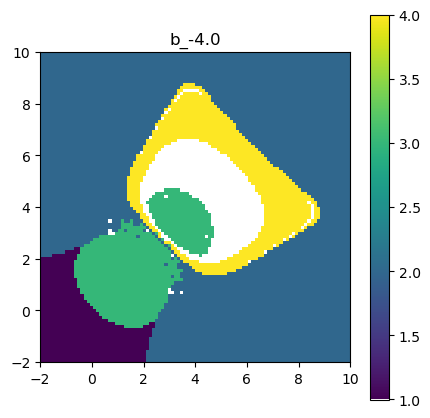

In [35]:
for key in slices:
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.imshow(data[key],origin="lower",extent=paramspace.ravel())
    plt.colorbar()
    plt.title(key)
    plt.show()